In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import data, datasets
import random

C:\Users\Scott Suk\miniconda3\envs\pytorch-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SEED = 5
random.seed(SEED)
torch.manual_seed(SEED)

In [3]:
# 하이퍼파라미터
BATCH_SIZE = 64
lr = 0.001
EPOCHS = 10

In [4]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", DEVICE)

cpu와 cuda 중 다음 기기로 학습함: cuda


In [5]:
print(torch.__version__)

1.12.0+cu116


In [13]:
train_iter = iter(datasets.IMDB(split="train"))
test_iter = iter(datasets.IMDB(split="train"))

In [36]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [37]:
vocab(['here', 'is', 'an', 'example'])

[131, 9, 39, 491]

In [40]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: 0 if x == 'neg' else 1

label_pipeline('neg')

0

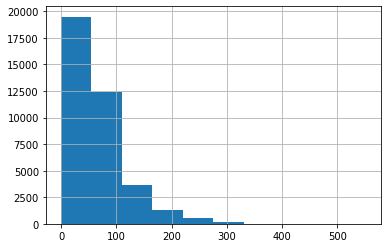

count    37500.000000
mean        69.033440
std         47.965645
min          0.000000
25%         39.000000
50%         54.000000
75%         84.000000
max        551.000000
dtype: float64

In [21]:
vocab_size = len(TEXT.vocab)
n_classes = 2
print('단어 집합의 크기 : {}'.format(vocab_size))
print('클래스의 개수 : {}'.format(n_classes))

In [ ]:
print(TEXT.vocab.stoi)


In [ ]:
trainset, valset = trainset.split(split_ratio=0.8)
